## EDA for hobby

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data dir

data_dir = 'D:/thon/project/tourism/02.국민여가활동조사/3.데이터'

# data load


h21 = pd.read_csv(data_dir + '/hobby_21.csv')
h21 = pd.DataFrame(h21)

C:\Users\sujin\AppData\Local\Temp\ipykernel_12080\2903619501.py:8: DtypeWarning: Columns (90,100,101,102,103,104,105,126) have mixed types. Specify dtype option on import or set low_memory=False.
  h21 = pd.read_csv(data_dir + '/hobby_21.csv')


In [30]:
h21.head()

,ID,q1_A,q1_A_m2,q1_A_m3,q1_A_m4,q1_A_m5,q1_A_m6,q1_A_m7,q1_A_m8,q1_B,...,DM4,DM5,DM6,DM7,DM8,DM9,DM10,DM11,DM11_1,DM12
0,1,99,,,,,,,,99,...,3,2,2,6,2,3,5,15,37050,3
1,2,99,,,,,,,,99,...,3,2,1,5,3,3,5,15,37050,3
2,3,99,,,,,,,,99,...,3,3,2,8,2,3,5,15,37050,3
3,4,99,,,,,,,,99,...,3,3,1,5,2,3,5,15,37050,3
4,5,,,,,,,7,,99,...,2,1,1,5,2,3,5,15,37050,3


In [31]:
h21.shape

# 10049 rows with 356 columns

(10049, 356)

In [3]:
# 스포츠관람/참여 체크한 row만 추출 (sportsman)

sportsman = h21.loc[(h21['q1_C'] != '99') | (h21['q1_D'] != '99')]

print(len(sportsman))

6826


In [4]:
# 의미있는 칼럼 리스트 생성
sports_col = ['q1_C', 'q1_C_m2', 'q1_C_m3', 'q1_C_m4', 'q1_D']

for i in range(17):
    sports_col.append('q1_D_m' + str(i+2))

sports_col.append('q6')
sports_col.append('q8')
sports_col.append('q11_1_C')
sports_col.append('q11_2_C')
sports_col.append('q11_1_D')
sports_col.append('q11_2_D')
sports_col.append('q11_3_D')
sports_col.append('q12_1_C')
sports_col.append('q12_2_C')
sports_col.append('q12_1_D')
sports_col.append('q12_2_D')
sports_col.append('q12_3_D')

sports_col.append('q30')
sports_col.append('q30_1')

for i in range(5):
    sports_col.append('q35_' + str(i+1))

sports_col.append('q45')
sports_col.append('q45_1')
sports_col.append('q45_2')
sports_col.append('q47')

for i in range(12):
    sports_col.append('DM' + str(i+1))

print(len(sports_col))

57


In [5]:
# spotsman df에서 의미있는 칼럼 sports col만 추출
sportsman_df = sportsman[sports_col]

print(sportsman_df.shape)

(6826, 57)


In [6]:
df = sportsman_df.convert_dtypes()
df = df.replace(" ", np.NaN) # 공백을 NA로 대체
print(df.head())

   q1_C q1_C_m2 q1_C_m3 q1_C_m4  q1_D q1_D_m2 q1_D_m3 q1_D_m4 q1_D_m5 q1_D_m6  \
4  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
5  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
6  <NA>      17    <NA>    <NA>    99    <NA>    <NA>    <NA>    <NA>    <NA>   
8    99    <NA>    <NA>    <NA>  <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
9  <NA>      17    <NA>    <NA>  <NA>    <NA>      22    <NA>    <NA>    <NA>   

   ... DM3 DM4 DM5 DM6 DM7 DM8 DM9 DM10 DM11 DM12  
4  ...   3   2   1   1   5   2   3    5   15    3  
5  ...   1   2   3   1   5   2   3    5   15    3  
6  ...   2   3   2   1   5   3   3    5   15    3  
8  ...   1   1   3   1   8   1   3    5   15    3  
9  ...   3   2   2   2   6   3   3    5   15    3  

[5 rows x 57 columns]


In [130]:
# 전체 결측 확인

print(df.isnull().sum())

q1_C        4430
q1_C_m2     2084
q1_C_m3     6519
q1_C_m4     6452
q1_D        4122
q1_D_m2     6728
q1_D_m3     6138
q1_D_m4     6084
q1_D_m5     6288
q1_D_m6     6462
q1_D_m7     6753
q1_D_m8     6718
q1_D_m9     6798
q1_D_m10    5523
q1_D_m11    6193
q1_D_m12    4961
q1_D_m13    6201
q1_D_m14    6700
q1_D_m15    6751
q1_D_m16    6444
q1_D_m17    6783
q1_D_m18    6787
q6          3838
q8          3838
q11_1_C        0
q11_2_C     2435
q11_1_D        0
q11_2_D     2636
q11_3_D        0
q12_1_C        0
q12_2_C     2424
q12_1_D        0
q12_2_D     2894
q12_3_D        0
q30            0
q30_1       3813
q35_1          0
q35_2          0
q35_3          0
q35_4          0
q35_5          0
q45            0
q45_1       2288
q45_2       4538
q47         2288
DM1            0
DM2            0
DM3            0
DM4            0
DM5            0
DM6            0
DM7            0
DM8            0
DM9            0
DM10           0
DM11           0
DM12           0
dtype: int64


In [7]:
# 스포츠관람활동 (직접관람, 간접관람, 격투관람, 온라인게임 관람)
sports_watch = df.shape[0] - df[['q1_C', 'q1_C_m2', 'q1_C_m3', 'q1_C_m4']].isnull().sum()

# 경기 관람을 1회 이상 한 사람
sports_watch.index = ["경기관람", "간접관람", "격투관람", "이스포츠"]
sports_watch

경기관람    2396
간접관람    4742
격투관람     307
이스포츠     374
dtype: int64

In [8]:
sports_active = df.shape[0] - df[['q1_D', 'q1_D_m2', 'q1_D_m3', 'q1_D_m4', 'q1_D_m5', 'q1_D_m6', 'q1_D_m7', 'q1_D_m8', 'q1_D_m9', 'q1_D_m10', 'q1_D_m11', 'q1_D_m12', 'q1_D_m13', 'q1_D_m14', 'q1_D_m15', 'q1_D_m16', 'q1_D_m17', 'q1_D_m18']].isnull().sum()
sports_active.index = ["농구/배구/야구/축구/족구", "테니스/스쿼시", "당구/포켓볼", "볼링/탁구", "골프", "수영", "수상스포츠", "스노보드/스키", "아이스스케이트/아이스하키", "헬스/에어로빅", "요가/필라테스/태보", "배드민턴/줄넘기/스트레칭/훌라후프",
"육상/조깅/속보", "격투스포츠", "댄스스포츠", "사이클링/산악자전거", "인라인스케이트", "승마/암벽등반/철인삼종경기/서바이벌"]
sports_active

농구/배구/야구/축구/족구         2704
테니스/스쿼시                  98
당구/포켓볼                  688
볼링/탁구                   742
골프                      538
수영                      364
수상스포츠                    73
스노보드/스키                 108
아이스스케이트/아이스하키            28
헬스/에어로빅                1303
요가/필라테스/태보              633
배드민턴/줄넘기/스트레칭/훌라후프     1865
육상/조깅/속보                625
격투스포츠                   126
댄스스포츠                    75
사이클링/산악자전거              382
인라인스케이트                  43
승마/암벽등반/철인삼종경기/서바이벌      39
dtype: int64

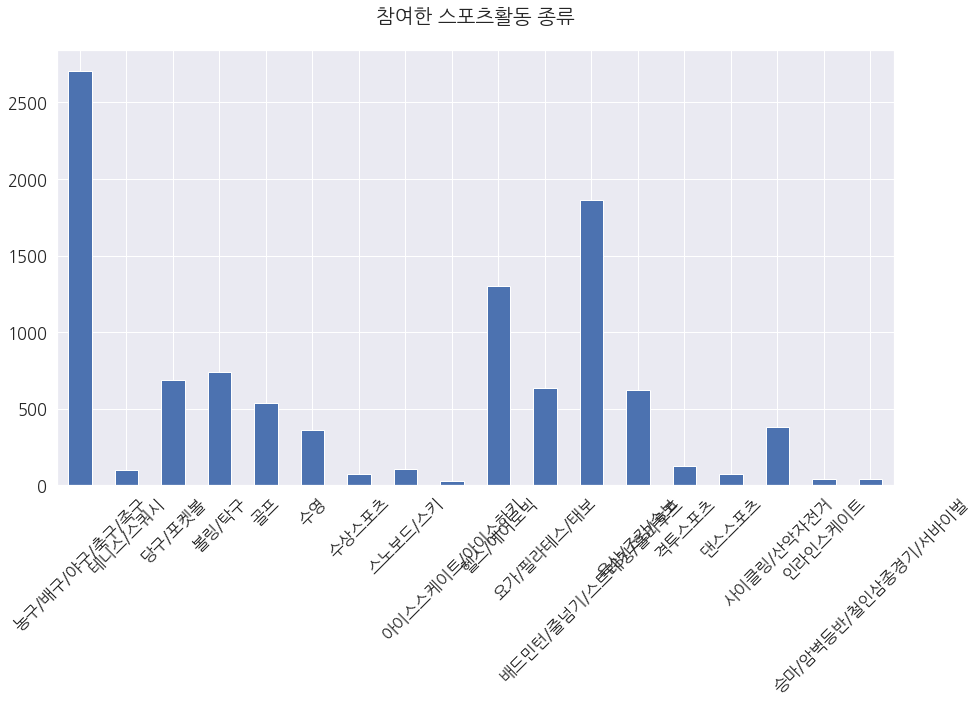

In [12]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(15, 8))
ax = sports_active.plot(kind = 'bar')
plt.xticks(rotation=45)
ax.set_title('참여한 스포츠활동 종류\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

### 1위 농구/배구/야구/축구/족구 2위 배드민턴/줄넘기/스트레칭/훌라후프 3위 헬스/에어로빅

In [13]:
#